In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
df = pd.read_excel("imdb_cleaned.xlsx", index_col=0)
df

,season,episode,episode_serie,title,summaries,airdates,ratings,total_votes,links,date_imdb
0,S1,E1,1,Simpsons Roasting on an Open Fire,Homer is forced to become a department store S...,17 Dec. 1989,8.1,7529,https://www.imdb.com/title/tt0348034/,1989-12-17
1,S1,E2,2,Bart the Genius,Bart ends up at a school for gifted children a...,14 Jan. 1990,7.7,5015,https://www.imdb.com/title/tt0756593/,1990-01-14
2,S1,E3,3,Homer's Odyssey,"After losing his job, Homer contemplates endin...",21 Jan. 1990,7.3,4427,https://www.imdb.com/title/tt0701124/,1990-01-21
3,S1,E4,4,There's No Disgrace Like Home,After being embarrassed by the rest of the fam...,28 Jan. 1990,7.7,4353,https://www.imdb.com/title/tt0756399/,1990-01-28
4,S1,E5,5,Bart the General,After being beaten up by Nelson Muntz one too ...,4 Feb. 1990,7.9,4687,https://www.imdb.com/title/tt0701059/,1990-02-04
...,...,...,...,...,...,...,...,...,...,...
722,S33,E18,723,My Octopus and a Teacher,Bart has romantic feelings for his new teacher,24 Apr. 2022,6.6,348,https://www.imdb.com/title/tt14458056/,2022-04-24
723,S33,E19,724,Girls Just Shauna Have Fun,Lisa finds an unlikely mentor in Shauna Chalme...,1 May 2022,6.6,325,https://www.imdb.com/title/tt14458070/,2022-05-01
724,S33,E20,725,Marge the Meanie,Marge bonds with Bart when she discovers a sec...,8 May 2022,6.7,301,https://www.imdb.com/title/tt14458078/,2022-05-08
725,S33,E21,726,Meat Is Murder,Grampa reconnects with an old associate in the...,15 May 2022,5.8,335,https://www.imdb.com/title/tt14458098/,2022-05-15


## Nb d'épisodes en tout

In [3]:
df.shape[0]

727

## Nb de saisons

In [4]:
df["season"].nunique()

33

## Nb moyen d'épisodes par saison

In [5]:
round(df["season"].value_counts().mean())

22

## Répartition du nb d'épisodes par saison

In [6]:
df["season"] = df["season"].replace("S","", regex=True).astype(int)
df["episode"] = df["episode"].replace("E","", regex=True).astype(int)
repartition_nb_ep = df["season"].value_counts().sort_index().to_frame()
repartition_nb_ep['index'] = range(1, len(repartition_nb_ep) + 1)
repartition_nb_ep = repartition_nb_ep.set_index("index", drop=False)
repartition_nb_ep = repartition_nb_ep.rename(columns = {'index':'num_season', 'season':'nb_ep'})
repartition_nb_ep = repartition_nb_ep[['num_season', 'nb_ep']]
repartition_nb_ep

,num_season,nb_ep
index,,
1,1,13
2,2,22
3,3,24
4,4,22
5,5,22
6,6,25
7,7,25
8,8,25
9,9,25


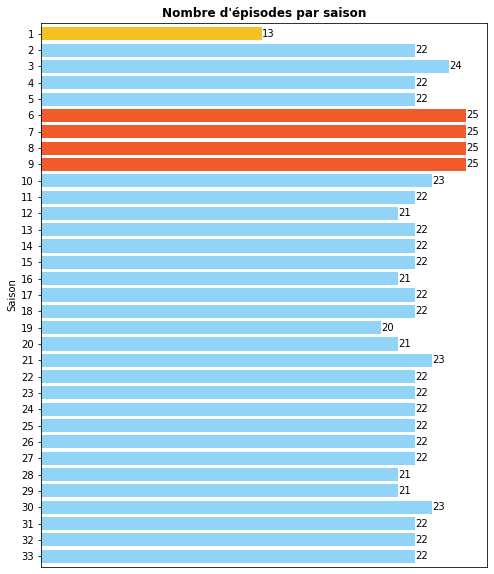

In [7]:
ep_color = [('#F5C024' if i == 13 else '#F15A2A' if i == 25 else '#92D4F8') for i in repartition_nb_ep['nb_ep']]

repartition_nb_ep.plot.barh(x='num_season', y='nb_ep', color=ep_color, figsize=[8,10], width=0.8).invert_yaxis()

plt.xlabel("")
plt.ylabel("Saison")

ax = plt.subplot(111)
ax.get_legend().remove()

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)

for index, value in enumerate(repartition_nb_ep["nb_ep"]):
    plt.text(value, index, str(value), va="center")

plt.title("Nombre d'épisodes par saison", x=0.5, y=1, fontweight="bold")

plt.show()

#plt.savefig('nb_ep_par_saison.png')

## Episodes les mieux et moins bien notés

In [8]:
best_ep_rating = df["ratings"].max()
df_max = df[df.ratings == best_ep_rating]
df_max

,season,episode,episode_serie,title,summaries,airdates,ratings,total_votes,links,date_imdb
175,8,23,176,Homer's Enemy,Homer's laziness begets the ire of his industr...,4 May 1997,9.3,5854,https://www.imdb.com/title/tt0701122/,1997-05-04


In [9]:
print("L'épisode le mieux noté sur IMDB est l'épisode " + str(df_max.iat[0,1]) + " de la saison " + str(df_max.iat[0,0]) + " ("+ str(df_max.iat[0,2]) + "ème épisode de la série).")
print("Il a obtenu une note moyenne de " + str(df_max.iat[0,6]) + "/10 décernée par " + str(df_max.iat[0,7]) + " utilisateurs d'IMDB.")
print("Diffusé pour la première fois le " + str(df_max.iat[0,5]) + ", cet épisode s'intitule '" + str(df_max.iat[0,3]) + "'. Voici son résumé:\n" + str(df_max.iat[0,4]))

L'épisode le mieux noté sur IMDB est l'épisode 23 de la saison 8 (176ème épisode de la série).
Il a obtenu une note moyenne de 9.3/10 décernée par 5854 utilisateurs d'IMDB.
Diffusé pour la première fois le 4 May 1997, cet épisode s'intitule 'Homer's Enemy'. Voici son résumé:
Homer's laziness begets the ire of his industrious but arrogant new co-worker Frank Grimes; Bart buys a run-down factory for a dollar.


In [10]:
worst_ep_rating = df["ratings"].min()
df_min = df[df.ratings == worst_ep_rating]
df_min

,season,episode,episode_serie,title,summaries,airdates,ratings,total_votes,links,date_imdb
507,23,22,508,Lisa Goes Gaga,After a desperate attempt by Lisa to become mo...,20 May 2012,4.0,2981,https://www.imdb.com/title/tt2403733/,2012-05-20


In [11]:
print("L'épisode le moins bien noté sur IMDB est l'épisode " + str(df_min.iat[0,1]) + " de la saison " + str(df_min.iat[0,0]) + " ("+ str(df_min.iat[0,2]) + "ème épisode de la série).")
print("Il a obtenu une note moyenne de " + str(df_min.iat[0,6]) + "/10 décernée par " + str(df_min.iat[0,7]) + " utilisateurs d'IMDB.")
print("Diffusé pour la première fois le " + str(df_min.iat[0,5]) + ", cet épisode s'intitule '" + str(df_min.iat[0,3]) + "'. Voici son résumé:\n" + str(df_min.iat[0,4]))

L'épisode le moins bien noté sur IMDB est l'épisode 22 de la saison 23 (508ème épisode de la série).
Il a obtenu une note moyenne de 4.0/10 décernée par 2981 utilisateurs d'IMDB.
Diffusé pour la première fois le 20 May 2012, cet épisode s'intitule 'Lisa Goes Gaga'. Voici son résumé:
After a desperate attempt by Lisa to become more popular backfires, Lady Gaga shows up in Springfield to help her with her self-esteem.


## Meilleurs et pires épisodes par saison

In [12]:
df_best_by_season = df.loc[df.groupby("season")["ratings"].idxmax()]
df_best_by_season = df_best_by_season.drop(columns=['links', 'date_imdb']).set_index('season')
df_best_by_season

,episode,episode_serie,title,summaries,airdates,ratings,total_votes
season,,,,,,,
1,12,12,Krusty Gets Busted,After Krusty is found guilty of robbing the Kw...,29 Apr. 1990,8.3,4230
2,11,24,"One Fish, Two Fish, Blowfish, Blue Fish","After apparently consuming poison blowfish, Ho...",24 Jan. 1991,8.8,4501
3,10,45,Flaming Moe's,Moe claims a drink that Homer invented is his ...,21 Nov. 1991,8.8,3937
4,12,71,Marge vs. the Monorail,After receiving a considerable donation of mon...,14 Jan. 1993,9.1,4973
5,2,83,Cape Feare,"After being released from prison on parole, Si...",7 Oct. 1993,9.1,4928
6,6,109,Treehouse of Horror V,The family's job at Mr. Burns' country estate ...,30 Oct. 1994,9.2,4395
7,1,129,Who Shot Mr. Burns? Part Two,Mr. Burns is laying in the hospital while the ...,17 Sep. 1995,9.0,3671
8,23,176,Homer's Enemy,Homer's laziness begets the ire of his industr...,4 May 1997,9.3,5854
9,1,179,The City of New York vs. Homer Simpson,Homer must travel to New York to get his car b...,21 Sep. 1997,9.0,4462


In [13]:
#print(df_best_by_season.to_html())

In [14]:
df_worst_by_season = df.loc[df.groupby("season")["ratings"].idxmin()]
df_worst_by_season = df_worst_by_season.drop(columns=['links', 'date_imdb']).set_index('season')
df_worst_by_season

,episode,episode_serie,title,summaries,airdates,ratings,total_votes
season,,,,,,,
1,3,3,Homer's Odyssey,"After losing his job, Homer contemplates endin...",21 Jan. 1990,7.3,4427
2,5,18,Dancin' Homer,Homer's heckling of the Springfield Isotopes b...,8 Nov. 1990,7.4,3492
3,6,41,"Like Father, Like Clown",Bart and Lisa try to reunite Krusty the Clown ...,24 Oct. 1991,7.6,3071
4,18,77,So It's Come to This: A Simpsons Clip Show,As Homer recovers in hospital due to Bart's di...,1 Apr. 1993,7.0,2618
5,21,102,Lady Bouvier's Lover,"Grampa falls in love with Marge's mother, but ...",12 May 1994,7.5,2431
6,3,106,Another Simpsons Clip Show,The family recalls past tales of lost love.,25 Sep. 1994,5.8,2467
7,10,138,The Simpsons 138th Episode Spectacular!,Troy McClure hosts a retrospective of the firs...,3 Dec. 1995,7.4,2431
8,24,177,The Simpsons Spin-Off Showcase,"Troy McClure presents three spinoffs: ""Chief W...",11 May 1997,7.1,2324
9,11,189,"All Singing, All Dancing",Homer is disappointed when the western he rent...,4 Jan. 1998,5.0,2412


In [15]:
#print(df_worst_by_season.to_html())

## Evolution des notes moyennes par saison

In [16]:
avr_ratings = df[["season", "ratings", "total_votes"]]
avr_ratings = avr_ratings.groupby('season').mean()
avr_ratings['index'] = range(1, len(avr_ratings) + 1)
avr_ratings = avr_ratings.set_index("index", drop=False)
avr_ratings = avr_ratings.rename(columns = {'index':'season'})
avr_ratings

,ratings,total_votes,season
index,,,
1,7.707692,4474.846154,1
2,8.004545,3593.681818,2
3,8.154167,3268.500000,3
4,8.272727,3307.500000,4
5,8.318182,3165.227273,5
6,8.344000,3056.160000,6
7,8.364000,2930.360000,7
8,8.224000,3006.920000,8
9,7.824000,2413.000000,9


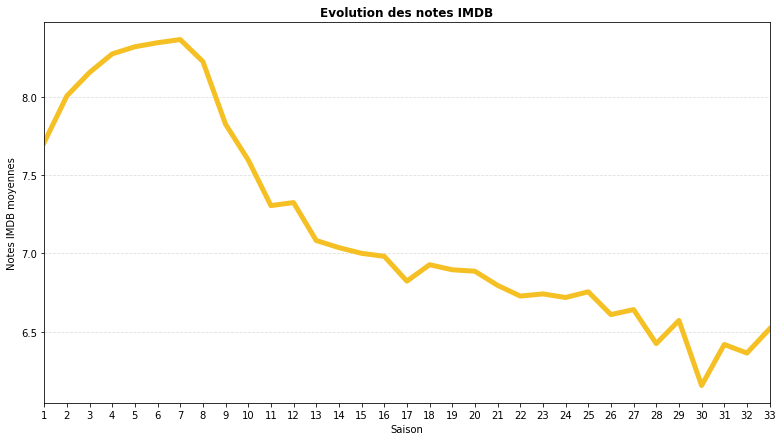

In [17]:
plt.figure(figsize=(13,7))

plt.plot(avr_ratings["season"], avr_ratings["ratings"], color='#F5C024', linewidth=5, label=None)

plt.xlim([1, 33])
plt.locator_params(axis='x', nbins=33)

plt.xlabel('Saison')
plt.ylabel('Notes IMDB moyennes')

plt.grid(axis='y', alpha=.4,linestyle='--')

plt.title("Evolution des notes IMDB", x=0.5, y=1, fontweight="bold")

plt.show()

#plt.savefig('evol_notes.png')

## Evolution du nombre moyen d'avis par saison

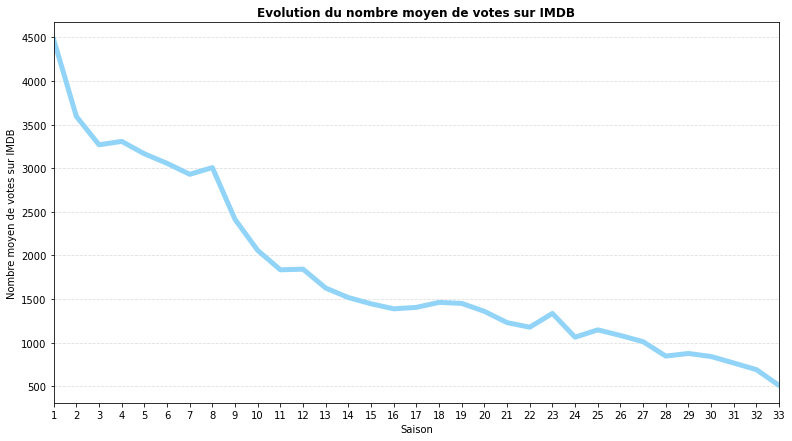

In [18]:
plt.figure(figsize=(13,7))

plt.plot(avr_ratings["season"], avr_ratings["total_votes"], color='#92D4F8', linewidth=5, label=None)

plt.xlim([1, 33])
plt.locator_params(axis='x', nbins=33)

plt.xlabel('Saison')
plt.ylabel('Nombre moyen de votes sur IMDB')

plt.grid(axis='y', alpha=.4,linestyle='--')

plt.title("Evolution du nombre moyen de votes sur IMDB", x=0.5, y=1, fontweight="bold")

plt.show()

#plt.savefig('evol_nb_notes.png')

## Nb de télespectateurs

In [19]:
df_kaggle0 = pd.read_csv("simpsons_episodes.csv")
df_kaggle0

,id,image_url,imdb_rating,imdb_votes,number_in_season,number_in_series,original_air_date,original_air_year,production_code,season,title,us_viewers_in_millions,video_url,views
0,10,http://static-media.fxx.com/img/FX_Networks_-_...,7.4,1511.0,10,10,1990-03-25,1990,7G10,1,Homer's Night Out,30.30,http://www.simpsonsworld.com/video/275197507879,50816.0
1,12,http://static-media.fxx.com/img/FX_Networks_-_...,8.3,1716.0,12,12,1990-04-29,1990,7G12,1,Krusty Gets Busted,30.40,http://www.simpsonsworld.com/video/288019523914,62561.0
2,14,http://static-media.fxx.com/img/FX_Networks_-_...,8.2,1638.0,1,14,1990-10-11,1990,7F03,2,"Bart Gets an ""F""",33.60,http://www.simpsonsworld.com/video/260539459671,59575.0
3,17,http://static-media.fxx.com/img/FX_Networks_-_...,8.1,1457.0,4,17,1990-11-01,1990,7F01,2,Two Cars in Every Garage and Three Eyes on Eve...,26.10,http://www.simpsonsworld.com/video/260537411822,64959.0
4,19,http://static-media.fxx.com/img/FX_Networks_-_...,8.0,1366.0,6,19,1990-11-15,1990,7F08,2,Dead Putting Society,25.40,http://www.simpsonsworld.com/video/260539459670,50691.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,500,http://static-media.fxx.com/img/FX_Networks_-_...,7.0,580.0,14,500,2012-02-19,2012,PABF07,23,At Long Last Leave,5.77,http://www.simpsonsworld.com/video/230541891832,45226.0
596,502,http://static-media.fxx.com/img/FX_Networks_-_...,7.3,541.0,16,502,2012-03-11,2012,PABF08,23,How I Wet Your Mother,4.97,http://www.simpsonsworld.com/video/230597187582,44818.0
597,511,http://static-media.fxx.com/img/FX_Networks_-_...,6.9,460.0,3,511,2012-11-04,2012,PABF18,24,Adventures in Baby-Getting,5.65,http://www.simpsonsworld.com/video/221688899646,39687.0
598,542,http://static-media.fxx.com/img/FX_Networks_-_...,6.4,473.0,12,542,2014-03-09,2014,SABF08,25,Diggs,2.69,http://www.simpsonsworld.com/video/310529091639,39292.0


In [20]:
df_kaggle0["us_viewers_in_millions"].sum()

7034.620000000001

## Episodes avec le plus et le moins de télespectateurs

In [21]:
most_viewed_ep = df_kaggle0["us_viewers_in_millions"].max()
df_most_viewed_ep = df_kaggle0[df_kaggle0["us_viewers_in_millions"] == most_viewed_ep]
df_most_viewed_ep

,id,image_url,imdb_rating,imdb_votes,number_in_season,number_in_series,original_air_date,original_air_year,production_code,season,title,us_viewers_in_millions,video_url,views
2,14,http://static-media.fxx.com/img/FX_Networks_-_...,8.2,1638.0,1,14,1990-10-11,1990,7F03,2,"Bart Gets an ""F""",33.6,http://www.simpsonsworld.com/video/260539459671,59575.0


In [22]:
less_viewed_ep = df_kaggle0["us_viewers_in_millions"].min()
df_less_viewed_ep = df_kaggle0[df_kaggle0["us_viewers_in_millions"] == less_viewed_ep]
df_less_viewed_ep

,id,image_url,imdb_rating,imdb_votes,number_in_season,number_in_series,original_air_date,original_air_year,production_code,season,title,us_viewers_in_millions,video_url,views
518,591,http://static-media.fxx.com/img/FX_Networks_-_...,6.5,246.0,17,591,2016-04-03,2016,VABF10,27,The Burns Cage,2.32,http://www.simpsonsworld.com/video/770893891557,190.0


## Episodes avec le plus et le moins de télespectateurs par saison

In [23]:
df_most_viewed_by_season = df_kaggle0.loc[df_kaggle0.groupby("season")["us_viewers_in_millions"].idxmax()]
df_most_viewed_by_season = df_most_viewed_by_season.drop(columns=['id', 'image_url', 'imdb_rating', 'imdb_votes', 'original_air_year', 'production_code', 'video_url', 'views']).set_index('season')
df_most_viewed_by_season

,number_in_season,number_in_series,original_air_date,title,us_viewers_in_millions
season,,,,,
1,9,9,1990-03-18,Life on the Fast Lane,33.50
2,1,14,1990-10-11,"Bart Gets an ""F""",33.60
3,20,55,1992-03-26,Colonel Homer,25.50
4,10,69,1992-12-03,Lisa's First Word,28.60
5,5,86,1993-10-28,Treehouse of Horror IV,24.00
6,6,109,1994-10-30,Treehouse of Horror V,22.20
7,6,134,1995-10-29,Treehouse of Horror VI,19.70
8,10,163,1997-01-12,The Springfield Files,20.90
9,2,180,1997-09-28,The Principal and the Pauper,14.90


In [24]:
#print(df_most_viewed_by_season.to_html())

In [25]:
df_less_viewed_by_season = df_kaggle0.loc[df_kaggle0.groupby("season")["us_viewers_in_millions"].idxmin()]
df_less_viewed_by_season = df_less_viewed_by_season.drop(columns=['id', 'image_url', 'imdb_rating', 'imdb_votes', 'original_air_year', 'production_code', 'video_url', 'views']).set_index('season')
df_less_viewed_by_season

,number_in_season,number_in_series,original_air_date,title,us_viewers_in_millions
season,,,,,
1,4,4,1990-01-28,There's No Disgrace Like Home,20.20
2,22,35,1991-07-11,Blood Feud,17.30
3,24,59,1992-08-27,"Brother, Can You Spare Two Dimes?",17.20
4,21,80,1993-05-06,Marge in Chains,17.30
5,18,99,1994-04-14,Burns' Heir,14.70
6,20,123,1995-04-09,Two Dozen and One Greyhounds,11.60
7,21,149,1996-04-14,22 Short Films About Springfield,10.50
8,12,165,1997-02-02,Mountain of Madness,9.10
9,20,198,1998-04-05,The Trouble with Trillions,7.40


In [26]:
#print(df_less_viewed_by_season.to_html())

## Evolution du nb de télespectateurs

In [27]:
df_kaggle = df_kaggle0[["season", "imdb_rating", "imdb_votes", "us_viewers_in_millions"]]
df_kaggle = df_kaggle.groupby('season').mean()
df_kaggle['index'] = range(1, len(df_kaggle) + 1)
df_kaggle = df_kaggle.set_index("index", drop=False)
df_kaggle = df_kaggle.rename(columns = {'index':'season'})
df_kaggle

,imdb_rating,imdb_votes,us_viewers_in_millions,season
index,,,,
1,7.807692,1819.384615,27.807692,1
2,8.040909,1416.454545,24.404545,2
3,8.154167,1311.916667,21.766667,3
4,8.268182,1347.500000,22.395455,4
5,8.336364,1264.545455,18.940909,5
6,8.312000,1235.240000,15.596000,6
7,8.324000,1184.560000,14.660000,7
8,8.220000,1233.560000,14.600000,8
9,7.844000,1013.360000,10.008000,9


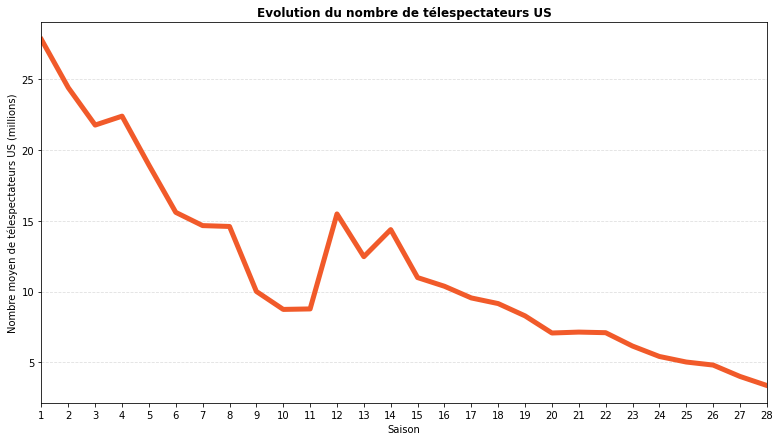

In [28]:
plt.figure(figsize=(13,7))

plt.plot(df_kaggle["season"], df_kaggle["us_viewers_in_millions"], color='#F15A2A', linewidth=5, label=None)

plt.xlim([1, 28])
plt.locator_params(axis='x', nbins=28)

plt.xlabel('Saison')
plt.ylabel('Nombre moyen de télespectateurs US (millions)')

plt.grid(axis='y', alpha=.4,linestyle='--')

plt.title("Evolution du nombre de télespectateurs US", x=0.5, y=1, fontweight="bold")

plt.show()

#plt.savefig('evol_viewers.png')

## Corrélation note/nb avis

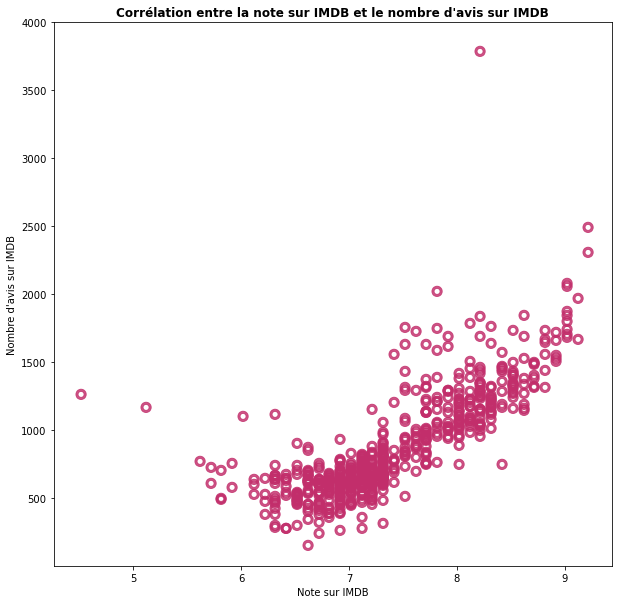

In [29]:
plt.figure(figsize=(10,10))

plt.scatter(df_kaggle0["imdb_rating"],df_kaggle0["imdb_votes"], s=600, c='#C22E6B', alpha=0.8, marker=r'$°$')

plt.xlabel("Note sur IMDB")
plt.ylabel("Nombre d'avis sur IMDB")

plt.ylim([1, 4000])

plt.title("Corrélation entre la note sur IMDB et le nombre d'avis sur IMDB", x=0.5, y=1, fontweight="bold")

plt.show()

#plt.savefig('correl_ratings_nb_ratings.png')

## Corrélation note/nb télespectateurs

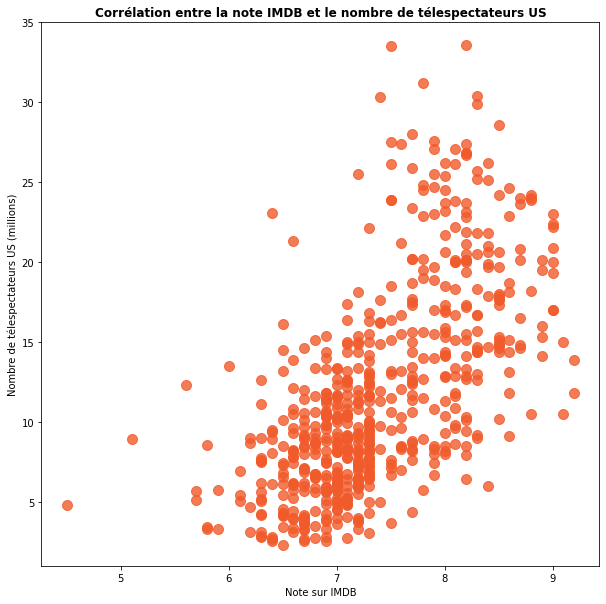

In [30]:
plt.figure(figsize=(10,10))

plt.scatter(df_kaggle0["imdb_rating"],df_kaggle0["us_viewers_in_millions"], s=100, c='#F15A2A', alpha=0.8, marker='o')

plt.xlabel('Note sur IMDB')
plt.ylabel('Nombre de télespectateurs US (millions)')

plt.ylim([1, 35])

plt.title("Corrélation entre la note IMDB et le nombre de télespectateurs US", x=0.5, y=1, fontweight="bold")

plt.show()

#plt.savefig('correl_ratings_viewers.png')